# Lab 06 Softmax Zoo_classifier

* Softmax를 사용하여 Zoo 데이터를 활용하여 분류를 진행합니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, Input

tf.random.set_seed(0)   # for reproducibility
print(tf.__version__)

2.12.0


In [10]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.int32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(list(y_data), nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

x_data = tf.cast(x_data, dtype=tf.float32)

print(x_data.shape, Y_one_hot.shape)
print(x_data.dtype, Y_one_hot.dtype)

(101, 16) (101, 7)
<dtype: 'float32'> <dtype: 'float32'>


In [13]:
#Weight and bias setting
W = tf.Variable(tf.random.normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits)
    cost = tf.reduce_mean(cost_i)
    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [14]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.experimental.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 2.965808153152466, Acc: 0.20792078971862793
Steps: 100 Loss: 0.7406893968582153, Acc: 0.801980197429657
Steps: 200 Loss: 0.49118950963020325, Acc: 0.8910890817642212
Steps: 300 Loss: 0.3735172152519226, Acc: 0.8910890817642212
Steps: 400 Loss: 0.2980981171131134, Acc: 0.9108911156654358
Steps: 500 Loss: 0.2444303333759308, Acc: 0.9405940771102905
Steps: 600 Loss: 0.20485420525074005, Acc: 0.9504950642585754
Steps: 700 Loss: 0.17501287162303925, Acc: 0.9603960514068604
Steps: 800 Loss: 0.15199492871761322, Acc: 0.9702970385551453
Steps: 900 Loss: 0.1338694542646408, Acc: 0.9801980257034302
Steps: 1000 Loss: 0.11934644728899002, Acc: 1.0


# Prediction Check

In [25]:
pred_result = hypothesis(x_data)
print(pred_result)
print(tf.argmax(pred_result, 1))
print(tf.argmax(Y_one_hot, 1)) # matches with y_data

tf.Tensor(
[[9.91941988e-01 5.46265437e-05 3.91108042e-04 7.20162518e-07
  6.96836598e-03 5.62239264e-04 8.09257399e-05]
 [9.97679055e-01 5.01763250e-04 6.61362486e-04 4.52845768e-07
  1.38556687e-04 9.82987811e-04 3.57866884e-05]
 [4.80894977e-03 4.54067858e-03 2.60614771e-02 9.54880595e-01
  3.31969908e-03 3.56884721e-06 6.38510752e-03]
 [9.91941988e-01 5.46265437e-05 3.91108042e-04 7.20162518e-07
  6.96836598e-03 5.62239264e-04 8.09257399e-05]
 [9.99182045e-01 1.00347919e-04 2.74695776e-04 2.07121090e-07
  3.04525980e-04 9.06662972e-05 4.74775043e-05]
 [9.97679055e-01 5.01763250e-04 6.61362486e-04 4.52845768e-07
  1.38556687e-04 9.82987811e-04 3.57866884e-05]
 [9.94682431e-01 1.04607339e-03 1.15936738e-03 1.07037954e-06
  1.44995924e-03 1.53963722e-03 1.21510100e-04]
 [9.33369214e-04 9.22864676e-03 2.14452799e-02 9.62113142e-01
  3.08172591e-03 1.18158159e-05 3.18607921e-03]
 [4.80894977e-03 4.54067858e-03 2.60614771e-02 9.54880595e-01
  3.31969908e-03 3.56884721e-06 6.38510752e-03]

# TensorFlow Sytle

In [19]:
softmax_classifier_model = tf.keras.Sequential([
    Input(shape=([16,])),
    layers.Dense(units=nb_classes, use_bias=True, activation='softmax')
])

softmax_classifier_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 7)                 119       
                                                                 
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer =  tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
softmax_classifier_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ["accuracy"])

In [21]:
hist = softmax_classifier_model.fit(x_data, Y_one_hot, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 1.9980 - accuracy: 0.2772 - 351ms/epoch - 88ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.5500 - accuracy: 0.5050 - 11ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.3656 - accuracy: 0.5545 - 12ms/epoch - 3ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.2122 - accuracy: 0.6733 - 13ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.0998 - accuracy: 0.6634 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.0041 - accuracy: 0.6931 - 11ms/epoch - 3ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.9388 - accuracy: 0.8119 - 11ms/epoch - 3ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.8705 - accuracy: 0.8515 - 12ms/epoch - 3ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.8176 - accuracy: 0.8515 - 11ms/epoch - 3ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.7768 - accuracy: 0.8317 - 12ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.7288 - accuracy: 0.8416 - 12ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.6922 - accuracy: 0.8713 - 12ms/epoch - 3ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.66

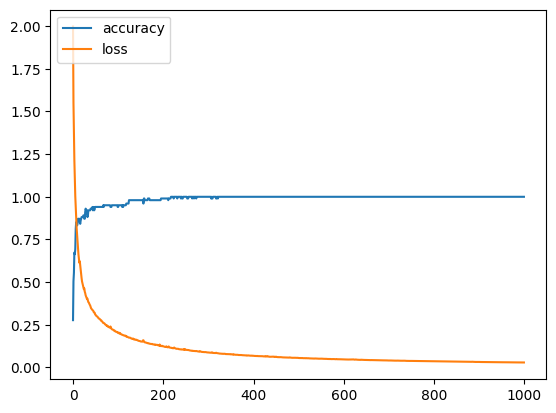

In [22]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.legend(loc='upper left')
plt.show()

In [23]:
loss, acc = softmax_classifier_model.evaluate(x_data, Y_one_hot, verbose=1)
print('Loss: {}, Accuracy: {}'.format(loss, acc))

4/4 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 1.0000
Loss: 0.029029792174696922, Accuracy: 1.0


In [24]:
pred = softmax_classifier_model.predict( x_data[3:4] ) 
print(pred.shape)
pred = np.argmax(pred, axis=1)
label = np.argmax(Y_one_hot[3:4], axis=1)

print('Prediction : ', pred)
print('Label : ', label)

1/1 [==============================] - 0s 78ms/step
(1, 7)
Prediction :  [0]
Label :  [0]
